<a href="https://colab.research.google.com/github/aleksanderprofic/Machine-Learning/blob/master/Classification/SVM/sklearn/social_network_ads_svm_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM)

## Data preprocessing

### Data loading

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### Data preprocessing

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#### Splitting the dataset into the Training set and the Test set

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### Feature scaling

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model training and predictions

### Performing Grid Search to find the best hyper parameters for each kernel

#### Linear

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = [{'C': [0, 0.1, 0.25, 0.5, 0.75, 1], 'kernel': ['linear']}]
grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters, scoring='accuracy', n_jobs=-1, cv=10)
grid_search.fit(X_train, y_train)
print('----- Linear SVM model -----')
print('Best mean accuracy: {:.2f}%'.format(grid_search.best_score_ * 100))
print('Best Standard deviation: {:.2f}%'.format(grid_search.cv_results_['std_test_score'][grid_search.best_index_] * 100))
print(f"Best parameters: {grid_search.best_params_}")

----- Linear SVM model -----
Best mean accuracy: 82.33%
Best Standard deviation: 8.83%
Best parameters: {'C': 0.25, 'kernel': 'linear'}


#### Rbf

In [9]:
parameters = [{'C': [0, 0.1, 0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters, scoring='accuracy', n_jobs=-1, cv=10)
grid_search.fit(X_train, y_train)
print('----- Kernel SVM model -----')
print('Best mean accuracy: {:.2f}%'.format(grid_search.best_score_ * 100))
print('Best Standard deviation: {:.2f}%'.format(grid_search.cv_results_['std_test_score'][grid_search.best_index_] * 100))
print(f"Best parameters: {grid_search.best_params_}")

----- Kernel SVM model -----
Best mean accuracy: 90.67%
Best Standard deviation: 6.11%
Best parameters: {'C': 0.5, 'gamma': 0.6, 'kernel': 'rbf'}


#### Sigmoid

In [10]:
parameters = [{'C': [0, 0.1, 0.25, 0.5, 0.75, 1], 'kernel': ['sigmoid'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters, scoring='accuracy', n_jobs=-1, cv=10)
grid_search.fit(X_train, y_train)
print('----- Sigmoid SVM model -----')
print('Best mean accuracy: {:.2f}%'.format(grid_search.best_score_ * 100))
print('Best Standard deviation: {:.2f}%'.format(grid_search.cv_results_['std_test_score'][grid_search.best_index_] * 100))
print(f"Best parameters: {grid_search.best_params_}")

----- Sigmoid SVM model -----
Best mean accuracy: 80.67%
Best Standard deviation: 9.52%
Best parameters: {'C': 0.75, 'gamma': 0.1, 'kernel': 'sigmoid'}


#### Poly

In [11]:
parameters = [{'C': [0, 0.1, 0.25, 0.5, 0.75, 1], 'kernel': ['poly'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'degree': [2,3,4,5,6,7]}]
grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters, scoring='accuracy', n_jobs=-1, cv=10)
grid_search.fit(X_train, y_train)
print('----- Poly SVM model -----')
print('Best mean accuracy: {:.2f}%'.format(grid_search.best_score_ * 100))
print('Best Standard deviation: {:.2f}%'.format(grid_search.cv_results_['std_test_score'][grid_search.best_index_] * 100))
print(f"Best parameters: {grid_search.best_params_}")

----- Poly SVM model -----
Best mean accuracy: 85.00%
Best Standard deviation: 5.00%
Best parameters: {'C': 0.75, 'degree': 5, 'gamma': 0.9, 'kernel': 'poly'}


### Training the models on the Training set

In [12]:
from sklearn.svm import SVC

linear_classifier = SVC(C=0.25, kernel='linear')
linear_classifier.fit(X_train, y_train)

kernel_classifier = SVC(C=0.5, kernel='rbf', gamma=0.6)
kernel_classifier.fit(X_train, y_train)

sigmoid_classifier = SVC(C=0.75, kernel='sigmoid', gamma=0.1)
sigmoid_classifier.fit(X_train, y_train)

poly_classifier = SVC(C=0.75, kernel='poly', gamma=0.9, degree=5)
poly_classifier.fit(X_train, y_train)

SVC(C=0.75, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma=0.9, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Predicting the Test set results

In [13]:
linear_y_pred = linear_classifier.predict(X_test)
kernel_y_pred = kernel_classifier.predict(X_test)
sigmoid_y_pred = sigmoid_classifier.predict(X_test)
poly_y_pred = poly_classifier.predict(X_test)

#### Creating Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, linear_y_pred)
print(f'Confusion Matrix for linear model: \n{cm}')
print(f'Accuracy: {accuracy_score(y_test, linear_y_pred)}\n')

cm = confusion_matrix(y_test, kernel_y_pred)
print(f'Confusion Matrix for rbf kernel model: \n{cm}')
print(f'Accuracy: {accuracy_score(y_test, kernel_y_pred)}\n')

cm = confusion_matrix(y_test, sigmoid_y_pred)
print(f'Confusion Matrix for sigmoid model: \n{cm}')
print(f'Accuracy: {accuracy_score(y_test, sigmoid_y_pred)}\n')

cm = confusion_matrix(y_test, poly_y_pred)
print(f'Confusion Matrix for poly model: \n{cm}')
print(f'Accuracy: {accuracy_score(y_test, poly_y_pred)}')

Confusion Matrix for linear model: 
[[66  2]
 [ 9 23]]
Accuracy: 0.89

Confusion Matrix for rbf kernel model: 
[[64  4]
 [ 3 29]]
Accuracy: 0.93

Confusion Matrix for sigmoid model: 
[[67  1]
 [ 9 23]]
Accuracy: 0.9

Confusion Matrix for poly model: 
[[65  3]
 [11 21]]
Accuracy: 0.86


## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


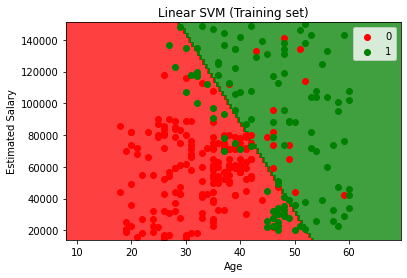

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.5))
plt.contourf(X1, X2, linear_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Linear SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


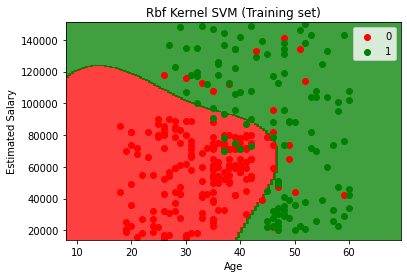

In [17]:
plt.contourf(X1, X2, kernel_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Rbf Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


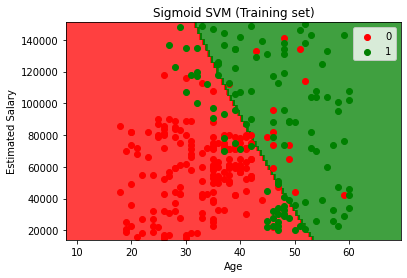

In [18]:
plt.contourf(X1, X2, sigmoid_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Sigmoid SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


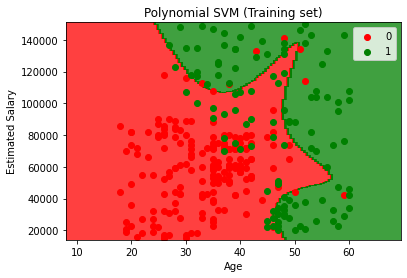

In [19]:
plt.contourf(X1, X2, poly_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Polynomial SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


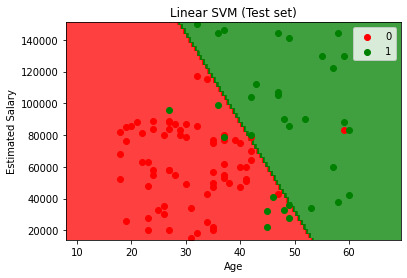

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.5))
plt.contourf(X1, X2, linear_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Linear SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


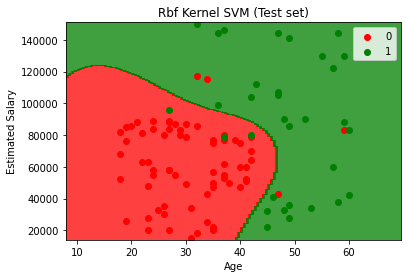

In [21]:
plt.contourf(X1, X2, kernel_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Rbf Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


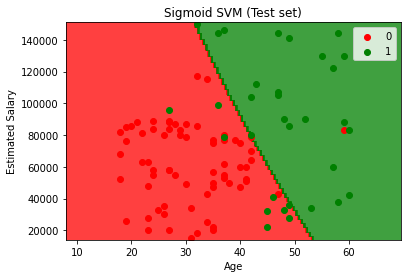

In [22]:
plt.contourf(X1, X2, sigmoid_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Sigmoid SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


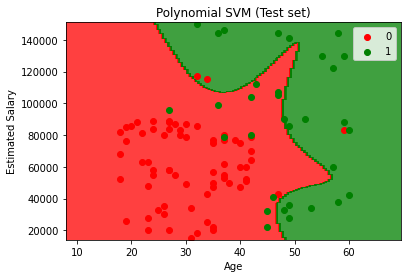

In [23]:
plt.contourf(X1, X2, poly_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Polynomial SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()